# Bank Churns Prediction Machine Learning

Project Report by Allentine Paulis

# Table of Contents
* [Project Description](#description)
* [Data](#data)
* [Step 1. Understanding Data and Data Preprocessing](#understanding)
* [Step 2. Train Machine Learning Model](#modeltrain)   
* [Step 3. Improve Machine Learning model Quality](#improve)
* [Step 4. Final Testing](#test)
* [Step 5. Check Sanity Model](#check)
* [Step 6. Overall conclusion](#allconclusion)

# Project Description <a class="anchor" id="description"></a>
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. We have the data on clients’ past behavior and termination of contracts with the bank.

We are going to build a model with the maximum possible F1 score. We need an F1 score of at least 0.59. Check the F1 for the test set. Additionally, measure the AUC-ROC metric and compare it with the F1.

# Data <a class="anchor" id="data"></a>
**Features**
- `RowNumber` — data string index
- `CustomerId` — unique customer identifier
- `Surname` — surname
- `CreditScore` — credit score
- `Geography` — country of residence
- `Gender` — gender
- `Age` — age
- `Tenure` — period of maturation for a customer’s fixed deposit (years)
- `Balance` — account balance
- `NumOfProducts` — number of banking products used by the customer
- `HasCrCard` — customer has a credit card
- `IsActiveMember` — customer’s activeness
- `EstimatedSalary` — estimated salary

**Target**
- `Exited` — сustomer has left

# Step 1. Understanding Data and Data Preprocessing<a class="anchor" id="understanding"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("https://code.s3.yandex.net/datasets/Churn.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [7]:
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
df['Tenure'].isna().sum()/len(df)*100

9.09

Tenure has missing values 999 rows or 9% of the data.

In [9]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

Replace the Tenure missing values with 0, assuming that 0 might be less than a year of Tenure or in certain months.

In [10]:
df['Tenure'] = df['Tenure'].fillna(0)

In [11]:
df['Tenure'].isna().sum()

0

In [12]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [13]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

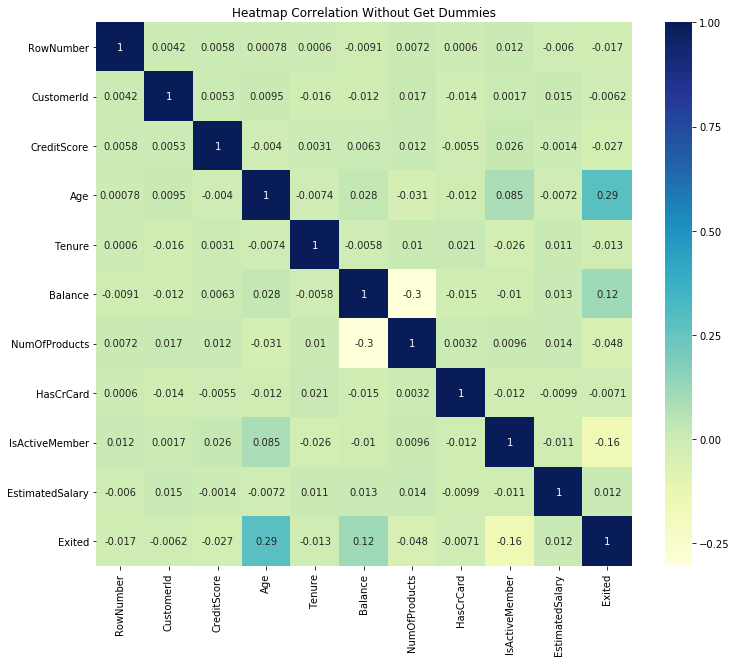

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap Correlation Without Get Dummies")
plt.show()

In [15]:
# Correlation with no get dummies
df.corr()['Exited'].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.013319
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

Removing Columns that are not needed and not related for the model which are RowNumber, CustomerID, Surname.

In [16]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Changing the object dtypes which are Geography and Gender with get dummies.

In [18]:
df = pd.get_dummies(df, drop_first=True)

In [19]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


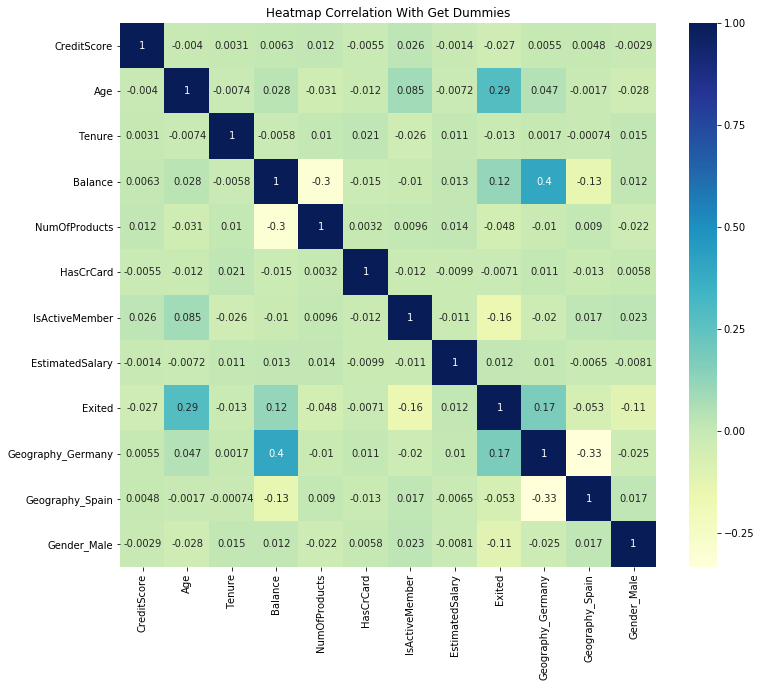

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Heatmap Correlation With Get Dummies")
plt.show()

In [21]:
# Correlation with get dummies
df.corr()['Exited'].sort_values(ascending=False)

Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.013319
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64

Age, Geography Germany and Balance has strong positive correlation with Exited. IsActiveMember has strong negative correlation with Exited.

In [22]:
df.duplicated().sum()

0

In [23]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9550,769,40,9.0,133871.05,1,1,1,50568.02,0,0,0,0
6631,613,44,3.0,0.00,2,0,1,136491.72,0,0,0,1
263,682,26,0.0,110654.02,1,0,1,111879.21,0,0,0,0
2124,704,32,7.0,127785.17,4,0,0,184464.70,1,0,0,1
4184,598,59,8.0,118210.42,2,0,0,60192.14,1,1,0,1


## Conclusion

- There are 14 columns and 10000 rows.
- Tenure has missing values 999 rows or 9% of the data.
- Replace the Tenure missing values with 0, assuming that 0 might be less than a year of Tenure or in certain month
- There is no duplicate
- Removing Columns that are not needed and not related for the model which are RowNumber, CustomerID, Surname.
- Changing the object dtypes which are Geography and Gender with get dummies.
- Age, Geography Germany and Balance has strong positive correlation with Exited. IsActiveMember has strong negative correlation with Exited.

# Step 2.  Train Machine Learning Model  <a class="anchor" id="modeltrain"></a>
Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe the findings.

Splitting the data

In [24]:
X = df.drop(['Exited'], axis=1)
y = df['Exited']

In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=12345)
X_test, X_valid, y_test, y_valid = train_test_split(X_valid, y_valid, test_size=0.5, random_state=12345)

In [26]:
print('Training set size:', X_train.shape[0])
print('Validating set size:', X_valid.shape[0])
print('Test set size:',X_test.shape[0])

Training set size: 6000
Validating set size: 2000
Test set size: 2000


Checking balance of class

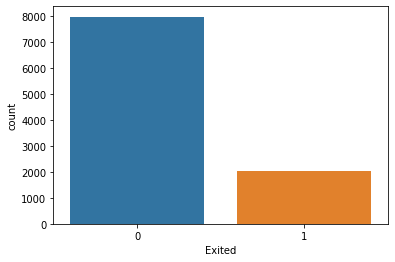

In [27]:
sns.countplot(df['Exited'])
plt.show()

In [28]:
df['Exited'].value_counts()/len(df) * 100

0    79.63
1    20.37
Name: Exited, dtype: float64

We can see the class is imbalanced.

Train the model without taking into account the imbalance.

## Logistic Regression

In [29]:
LR_model = LogisticRegression(random_state=12345, solver='liblinear')
LR_model.fit(X_train, y_train)
predicted_valid = LR_model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid, predicted_valid)
print('Accuracy is:', accuracy_valid)
print('F1_Score is:', f1_score(y_valid, predicted_valid))

confusion_matrix(y_valid, predicted_valid)

Accuracy is: 0.7875
F1_Score is: 0.13441955193482688


array([[1542,   35],
       [ 390,   33]])

## Random Forest Classifier

Estimator: 10 Accuracy: 0.8435 F1_Score is: 0.5162287480680061
Estimator: 15 Accuracy: 0.839 F1_Score is: 0.5278592375366569
Estimator: 20 Accuracy: 0.842 F1_Score is: 0.5123456790123456
Estimator: 25 Accuracy: 0.8465 F1_Score is: 0.5397301349325337
Estimator: 30 Accuracy: 0.845 F1_Score is: 0.5245398773006135
Estimator: 35 Accuracy: 0.8495 F1_Score is: 0.5487256371814092
Estimator: 40 Accuracy: 0.847 F1_Score is: 0.5321100917431193
Estimator: 45 Accuracy: 0.8465 F1_Score is: 0.5411061285500747
Estimator: 50 Accuracy: 0.849 F1_Score is: 0.5438066465256798
Estimator: 55 Accuracy: 0.852 F1_Score is: 0.5568862275449102
Estimator: 60 Accuracy: 0.848 F1_Score is: 0.5365853658536586
Estimator: 65 Accuracy: 0.8485 F1_Score is: 0.5416036308623298
Estimator: 70 Accuracy: 0.849 F1_Score is: 0.5424242424242424
Estimator: 75 Accuracy: 0.8475 F1_Score is: 0.542728635682159
Estimator: 80 Accuracy: 0.8485 F1_Score is: 0.5443609022556392
Estimator: 85 Accuracy: 0.8475 F1_Score is: 0.5468053491827638
E

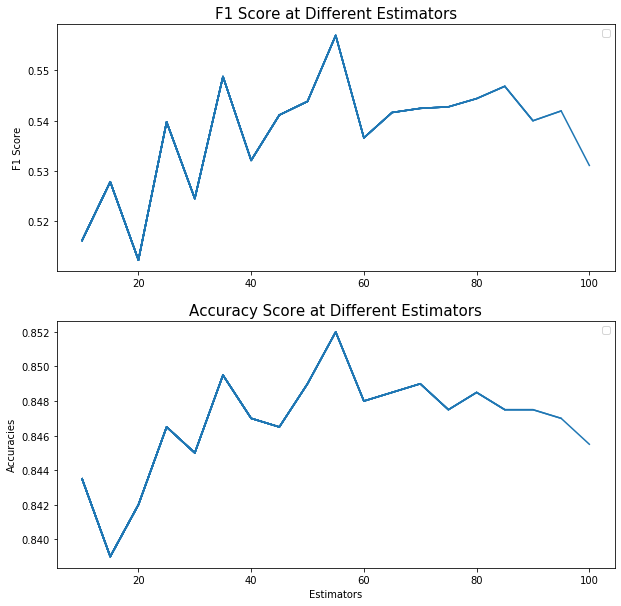

In [30]:
estimators = []
RFC_accuracy = []
f1score_accuracy=[]
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(10,10))

for estim in range(10,101,5):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = accuracy_score(y_valid, y_pred)
    f1score = f1_score(y_valid, y_pred)
    estimators.append(estim)
    RFC_accuracy.append(score)
    f1score_accuracy.append(f1score)
    print('Estimator:', estim, end='')
    print(' Accuracy:', score, end='')
    print(' F1_Score is:', f1score)
    sns.lineplot(data=pd.DataFrame(data=f1score_accuracy, index=estimators), ax=ax1)
    sns.lineplot(data=pd.DataFrame(data=RFC_accuracy, index=estimators), ax=ax2)
ax1.set_title("F1 Score at Different Estimators", fontsize=15) 
ax1.set_ylabel("F1 Score")
ax1.legend('')
ax2.set_title("Accuracy Score at Different Estimators", fontsize=15) 
ax2.set_ylabel("Accuracies") 
ax2.legend('')
plt.xlabel('Estimators')
plt.show()

The best Random Forest Classifier is with n_estimators 55, accuracy 0.852 and f1 score is 0.557

## Conclusion

- The target or y is Exited
- The features or X are CreditScore, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited, Geography_Germany, Geography_Spain,  Gender_Male
- The ratio of train : valid : test = 6 : 2 : 2
- Logistic Regression model has Accuracy: 0.7875 and F1_Score: 0.13441955193482688
- The best Random Forest Classifier is with n_estimators 55, accuracy 0.852 and F1 score is 0.557

# Step 3. Improve Machine Learning model Quality  <a class="anchor" id="improve"></a>
Improve the quality of the model. Use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe the findings.

Normalization/ Standardizing using StandardScaler

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_valid = scaler.transform(X_valid)
scaled_X_test = scaler.transform(X_test)
df_scaled_X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index=X_train.index)

## Logistic Regression with Class Weight = balanced

In [32]:
LR_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
LR_model.fit(scaled_X_train, y_train)
predicted_valid = LR_model.predict(scaled_X_valid)
accuracy_valid = accuracy_score(y_valid, predicted_valid)
print('Accuracy is:', accuracy_valid)
print('F1_Score is:', f1_score(y_valid, predicted_valid))

confusion_matrix(y_valid, predicted_valid)

Accuracy is: 0.6985
F1_Score is: 0.4797238999137188


array([[1119,  458],
       [ 145,  278]])

## Random Forest Classifier with Class Weight = balanced

In [33]:
d = defaultdict(list)
for estim in range(50,101,5):
    for depth in range(10,15):
        model = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth, class_weight='balanced')
        model.fit(scaled_X_train, y_train)
        y_pred = model.predict(scaled_X_valid)
        score = accuracy_score(y_valid, y_pred)
        f1score = f1_score(y_valid, y_pred)
        d['estim'].append(estim)
        d['depth'].append(depth)
        d['accuracy'].append(score)
        d['f1_score'].append(f1score)
        print('Estimator:', estim, end='')
        print(' Max Depth:', depth, end='')
        print(' Accuracy:', score, end='')
        print(' F1_Score is:', f1score)
pd.DataFrame(d).sort_values(by='f1_score',ascending=False).head()

Estimator: 50 Max Depth: 10 Accuracy: 0.834 F1_Score is: 0.6028708133971291
Estimator: 50 Max Depth: 11 Accuracy: 0.8415 F1_Score is: 0.59514687100894
Estimator: 50 Max Depth: 12 Accuracy: 0.8375 F1_Score is: 0.5706737120211359
Estimator: 50 Max Depth: 13 Accuracy: 0.8485 F1_Score is: 0.5738396624472574
Estimator: 50 Max Depth: 14 Accuracy: 0.8545 F1_Score is: 0.5776487663280118
Estimator: 55 Max Depth: 10 Accuracy: 0.833 F1_Score is: 0.5995203836930455
Estimator: 55 Max Depth: 11 Accuracy: 0.8445 F1_Score is: 0.6007702182284981
Estimator: 55 Max Depth: 12 Accuracy: 0.842 F1_Score is: 0.582010582010582
Estimator: 55 Max Depth: 13 Accuracy: 0.848 F1_Score is: 0.5754189944134078
Estimator: 55 Max Depth: 14 Accuracy: 0.8535 F1_Score is: 0.5784172661870504
Estimator: 60 Max Depth: 10 Accuracy: 0.8335 F1_Score is: 0.6021505376344086
Estimator: 60 Max Depth: 11 Accuracy: 0.847 F1_Score is: 0.6056701030927836
Estimator: 60 Max Depth: 12 Accuracy: 0.8415 F1_Score is: 0.5823451910408431
Estimat

,estim,depth,accuracy,f1_score
45,95,10,0.8420,0.618357
50,100,10,0.8400,0.617225
30,80,10,0.8400,0.615385
35,85,10,0.8395,0.614646
40,90,10,0.8400,0.613527


- Random Forest Classifier with class weight balance and n Estimators 95 and Max Depth 10, Accuracy: 0.8420 and F1_Score is: 0.618357
- With the class weight= balanced, this model f1 score is already improved than the previous Random Forest Classifier Model with n_estimators 55 and f1 score is 0.557

Let's try to train our model by increasing the sample, duplicate positive observations

In [34]:
def upsampling(features, target, repeat):
    X_zeros = pd.DataFrame(scaled_X_train[y_train == 0], columns = X_train[y_train == 0].columns, index=X_train[y_train == 0].index)
    X_ones = pd.DataFrame(scaled_X_train[y_train == 1], columns = X_train[y_train == 1].columns, index=X_train[y_train == 1].index)
    y_zeros = y_train[y_train == 0]
    y_ones = y_train[y_train == 1]

    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

In [35]:
for repeat in range(1,10,1):
    X_upsampled, y_upsampled = upsampling(scaled_X_train, y_train, repeat)

    model = RandomForestClassifier(random_state=12345, n_estimators = 95, max_depth=10, class_weight='balanced')
    model.fit(X_upsampled, y_upsampled)
    y_pred = model.predict(scaled_X_valid)
    f1score = f1_score(y_valid, y_pred)
    print("Repeats:", repeat, end='')
    print(" F1 Score: ", f1score)

Repeats: 1 F1 Score:  0.6021505376344086
Repeats: 2 F1 Score:  0.6179401993355481
Repeats: 3 F1 Score:  0.6122004357298474
Repeats: 4 F1 Score:  0.6070287539936102
Repeats: 5 F1 Score:  0.6038543897216274
Repeats: 6 F1 Score:  0.6098081023454157
Repeats: 7 F1 Score:  0.5976768743400211
Repeats: 8 F1 Score:  0.6086956521739131
Repeats: 9 F1 Score:  0.6023329798515377


The best upsampling with class weigh balanced is with repeats 2 with F1 score 0.6179. It doesn't improve F1 Score.

Let's try to train our model by reducing the sample, drop a portion of negative observations.

In [36]:
def downsampling(X, y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]

    X_downsampled = pd.concat(
        [X_zeros.sample(frac=fraction, random_state=12345)] + [X_ones])
    y_downsampled = pd.concat(
        [y_zeros.sample(frac=fraction, random_state=12345)] + [y_ones])
    
    X_downsampled, y_downsampled = shuffle(
        X_downsampled, y_downsampled, random_state=12345)
    
    return X_downsampled, y_downsampled

for i in np.arange(0.03, 0.37, 0.03):
    X_downsampled, y_downsampled = downsampling(df_scaled_X_train, y_train, i)
    model = RandomForestClassifier(random_state=12345, n_estimators = 95, max_depth=10, class_weight='balanced')
    model.fit(X_downsampled, y_downsampled)
    y_pred = model.predict(scaled_X_valid)
    f1score = f1_score(y_valid, y_pred)
    print("Fractions:", i, end='')
    print(" F1 Score: ", f1score)

Fractions: 0.03 F1 Score:  0.4083457526080477
Fractions: 0.06 F1 Score:  0.4747847478474785
Fractions: 0.09 F1 Score:  0.5173635719347981
Fractions: 0.12 F1 Score:  0.5301757066462949
Fractions: 0.15 F1 Score:  0.5563665855636658
Fractions: 0.18 F1 Score:  0.5668085106382978
Fractions: 0.21 F1 Score:  0.5790884718498659
Fractions: 0.24 F1 Score:  0.5814167433302668
Fractions: 0.27 F1 Score:  0.5869980879541109
Fractions: 0.30000000000000004 F1 Score:  0.5899419729206964
Fractions: 0.32999999999999996 F1 Score:  0.6003976143141153
Fractions: 0.36 F1 Score:  0.5888324873096447


The best downsampling with class weigh balanced is with fractions 0.33  with F1 score 0.6003. It doesn't improve F1 Score.

## Conclusion

- Using Standard Scaler to normalization the data
- Using Class weight = balanced to improve the model f1 score
- The best F1 score 0.618357 is achieved using Random Forest Classifier with class weight balance and n Estimators 95 and Max Depth 10, Accuracy: 0.8420
- The best upsampling with class weigh balanced is with repeats 2 with F1 score 0.6179.
- The best downsampling with class weigh balanced is with fractions 0.33 with F1 score 0.6003.
- Upsampling and downsampling are failed to increase f1 score, even though upsampling is still better and closer to the best f1 score than downsampling. 

# Step 4. Final Testing  <a class="anchor" id="test"></a>

## Conclusion

# Step 5. Check Sanity Model  <a class="anchor" id="check"></a>
Sanity check the model. 

# Step 6. Overall Conclusion  <a class="anchor" id="allconclusion"></a>